# Step 1. Load and Preprocess data
version 4.0 August 1 2018

## A. Introduction

In this notebook we load and preprocess the HRS data. We have loadded HRS2000 (Rand version) and the ADAMS sub-sample. Steps taken are as follows:

1. Process ADAMS data, merge with HRS 2000 and 2002, calculate score and save it into `final_adams_and_hrs.csv` [1770 obs]

2. Process ADAMS as above but only 856 obs from the sample which responded `final_adams_and_hrs_small.csv` [856 obs]

2. Process HRS 2000 data, calculate score and save it into `processed_hrs2000.csv, processed_hrs2000.pkl` [Too large to save to git]

3. Other files - `in_adams (hhidpns in Adams), in_2000 (HRS2000), in_2002 (HRS2000), in_adams2 (HRS2002 in Adams)`

4. We calculate the following scores: immediate recall, delayed recall, total recall, tics, serial 7, backwards, total cog. 

5. We calculate the following labels: brain_health1, brain_health2, brain_health3**

**Number of features in the thousands. See Step 2. EDA notebook for exploration.**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import recode_functions as rf


%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Helper function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)
    
LOCAL_DIR = '/home/jovyan/notebook/'

## B. Process for Data Ingestion and Simple Preprocessing

* Load ADAMS File
* Process file, add in detailed ADAMS A data
* Load RAND FAT FILES for 2000 and 2002
* Calculate score
* Merge databases


### Load and process ADAMS data

In [3]:
# Load ADAMS tracker file
table_adams = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/adams/ADAMS1TRK.csv')

In [4]:
table_adams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Columns: 120 entries, HHID to VERSION
dtypes: float64(50), int64(68), object(2)
memory usage: 1.6+ MB


In [5]:
table_adams['hhidpn'] = 1000 * table_adams['HHID'] + table_adams['PN']

In [6]:
# Write the ADAMS full sample n = 1770 individuals, hhidpn id
table_adams['hhidpn'].to_csv(LOCAL_DIR + 'brainFitDx/data/sample/sample-ids.csv')

In [7]:
# Add in wave A detailed tables
table_b = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/adams/adams_section_b.csv')
table_c = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/adams/adams_section_c.csv')
table_d = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/adams/adams_section_d.csv')
#table_e = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_e.csv')
#table_f = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_f.csv')
#table_g = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_g.csv')
#table_h = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_h.csv')
#table_j = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_j.csv')
#table_m = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_m.csv')
#table_n = pd.read_csv('/home/levi/data/brainFitDx/data/adams/adams_section_n.csv')

In [8]:
table_b['hhidpn'] = 1000 * table_b['HHID'] + table_b['PN']
table_c['hhidpn'] = 1000 * table_c['HHID'] + table_c['PN']
table_d['hhidpn'] = 1000 * table_d['HHID'] + table_d['PN']
#table_e['hhidpn'] = 1000 * table_e['HHID'] + table_e['PN']
#table_f['hhidpn'] = 1000 * table_f['HHID'] + table_f['PN']
#table_g['hhidpn'] = 1000 * table_g['HHID'] + table_g['PN']
#table_h['hhidpn'] = 1000 * table_h['HHID'] + table_h['PN']
#table_j['hhidpn'] = 1000 * table_j['HHID'] + table_j['PN']
#table_m['hhidpn'] = 1000 * table_m['HHID'] + table_m['PN']
#table_n['hhidpn'] = 1000 * table_n['HHID'] + table_n['PN']

In [9]:
table_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 102 entries, HHID to hhidpn
dtypes: float64(22), int64(75), object(5)
memory usage: 682.2+ KB


In [10]:
table_c.loc[table_c['hhidpn'].isin(table_adams['hhidpn']),:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 855
Columns: 213 entries, HHID to hhidpn
dtypes: float64(205), int64(8)
memory usage: 1.4 MB


In [11]:
table_temp = pd.merge(table_adams, table_b, how='left', on='hhidpn', suffixes=('', '_y'))
table_temp = pd.merge(table_temp, table_c, how='left', on='hhidpn', suffixes=('', '_y'))
table_temp = pd.merge(table_temp, table_d, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_e, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_f, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_g, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_h, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_j, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_m, how='left', on='hhidpn', suffixes=('', '_y'))
#table_temp = pd.merge(table_temp, table_n, how='left', on='hhidpn', suffixes=('', '_y'))

In [12]:
# Remove duplicate cols
drop_y(table_temp)

In [13]:
# Check that there are no duplicate cols
table_temp.loc[:,['HHID_y', 'PN_y','hhidpn']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Data columns (total 3 columns):
HHID_y    0 non-null float64
PN_y      0 non-null float64
hhidpn    1770 non-null int64
dtypes: float64(2), int64(1)
memory usage: 55.3 KB


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [14]:
# Write full adams data
table_temp.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/raw_adams_combined.csv', index=False)

In [15]:
table_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Columns: 653 entries, HHID to ADMH9SP
dtypes: float64(566), int64(69), object(18)
memory usage: 8.8+ MB


### Load and process RAND 2000 and 2002 files

In [16]:
# Load raw datafiles
table_2000 = pd.read_stata(LOCAL_DIR + 'braindata/hrs2000/h00f1c.dta')
table_2002 = pd.read_stata(LOCAL_DIR + 'braindata/hrs2002/h02f2c.dta')

In [17]:
# Load full adams
table_adams = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/sample/raw_adams_combined.csv')

In [18]:
table_adams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Columns: 653 entries, HHID to ADMH9SP
dtypes: float64(566), int64(69), object(18)
memory usage: 8.8+ MB


In [19]:
table_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 19578
Columns: 6155 entries, hhidpn to h5hhid
dtypes: float32(5), float64(5269), int16(55), int32(8), int8(352), object(466)
memory usage: 866.4+ MB


In [20]:
table_2002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18165 entries, 0 to 18164
Columns: 6696 entries, hhidpn to _hqp287_2
dtypes: float32(2), float64(6227), int16(6), int32(54), int8(124), object(283)
memory usage: 908.6+ MB


In [21]:
in_adams = table_adams['hhidpn'].tolist()
in_2000 = table_2000['hhidpn'].tolist()
in_2002 = table_2002['hhidpn'].tolist()

In [22]:
# Participants not in 2000 HRS n=35
x1 = [c for c in in_adams if c not in in_2000]
print (x1)
print (len(x1))

[12106011, 12118030, 14535011, 23942011, 51062041, 52258040, 52829011, 57246010, 73112010, 73527030, 74032010, 85314030, 200881010, 201115020, 201497010, 201503010, 201506010, 201807010, 201953010, 202489010, 202649020, 203361020, 203571010, 203872010, 204213010, 204532010, 205034010, 206322010, 206477010, 208291010, 210102010, 210913010, 211411010, 212963020, 213221010]
35


In [23]:
# Check to see if any participants in 2000 not in 2002
x2 = [c for c in x1 if c not in in_2002]
print (x2)
print (len(x2))

[]
0


In [24]:
in_adams02 = x1

In [25]:
# Merge adams with 2000 file n= 1735
table_full_sample = pd.merge(table_adams, table_2000, how='left', on='hhidpn', suffixes=('', '_y'))
table_full_sample = pd.merge(table_full_sample, table_2002, how='left', on='hhidpn', suffixes=('', '_y'))

In [26]:
# Drop duplicate cols
drop_y(table_full_sample)
table_full_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Columns: 13478 entries, HHID to _hqp287_2
dtypes: float32(7), float64(12643), int64(69), object(759)
memory usage: 182.0+ MB


In [27]:
table_full_sample.head(10)

,HHID,PN,ADAMSSID,GSUBHH,HSUBHH,SUBHHFLG,AASSESS,AMONTH,AYEAR,AFRESULT,...,_hqp220_1,_hqp227_1,_hqp235_1,_hqp220_2,_hqp227_2,_hqp235_2,_hqp278_1,_hqp287_1,_hqp278_2,_hqp287_2
0,10059,30,13211,0,0,5,1,4,2002,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11379,10,15741,0,0,5,5,97,9997,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12106,11,15441,9,0,1,5,97,9997,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12118,30,20231,0,0,5,5,97,9997,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12513,10,14391,0,0,5,1,10,2002,1,...,NaN,NaN,NaN,NaN,NaN,NaN,9999998.0,2.0,NaN,NaN
5,12588,20,16241,0,0,5,1,5,2003,1,...,9999998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13140,10,20121,0,0,5,1,6,2003,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13857,10,19431,0,0,5,1,10,2003,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14223,10,16441,0,0,5,5,97,9997,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14259,20,20091,0,0,5,5,97,9997,5,...,900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Check to make sure duplicates are removed
table_full_sample.loc[:,['HHID_y', 'ADAMSSID_y','hhidpn','h5hhid']].head(10)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,HHID_y,ADAMSSID_y,hhidpn,h5hhid
0,NaN,NaN,10059030,100590.0
1,NaN,NaN,11379010,113790.0
2,NaN,NaN,12106011,NaN
3,NaN,NaN,12118030,NaN
4,NaN,NaN,12513010,125130.0
5,NaN,NaN,12588020,125880.0
6,NaN,NaN,13140010,131400.0
7,NaN,NaN,13857010,138570.0
8,NaN,NaN,14223010,142230.0
9,NaN,NaN,14259020,142590.0


In [29]:
# Write to file
table_full_sample.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/final_adams_hrs_combined.csv', index=False)

## C. Calculate scores

Note: We first calculate for HRS 2000 but have to add in HRS 2002 pop

In [30]:
# load file
# table_full_sample = pd.read_csv('/home/levi/data/brainFitDx/data/sample/final_adams_hrs_combined.csv')
df = table_full_sample

In [31]:
# recode backwards count 20
backwards_20=rf.initialize_series(df)
indices=rf.get_indices([df['g1733']==1, # 1
                        df['g1710']==1 # 2
                       ])
backwards_20=rf.update_series(backwards_20, indices, values=[1,2])

In [32]:
# examine recode
backwards_20.value_counts()

2    1055
0     708
1       7
dtype: int64

In [33]:
# examine immediate recall questions (G1666M1-G1666M11)
df['g1666m1'].unique()

array([ nan,  31.,  51.,  19.,  30.,   1.,   4.,  38.,   8.,  40.,  23.,
        18.,  96.,  15.,   3.,  25.,  16.,  22.,  11.,  29.,  20.,  39.,
        32.,  21.,  33.,  10.,  35.,  27.,   2.,  28.,  37.,  12.,   5.,
        34.,   9.,   7.,  14.,  24.,  99.,  13.,   6.,  17.,  98.,  26.,
        36.])

In [34]:
# compute immediate recall score (G1666M1-G1666M11)
immediate_recall=pd.Series(rf.compute_recall(df, cols=['g1666m1','g1666m11']))

In [35]:
# examine immediate recall score
sum(immediate_recall.isnull()) # no missing values
immediate_recall.unique()
immediate_recall.value_counts()

0     594
4     258
3     239
5     232
6     145
2     124
7      70
1      57
8      34
9      12
10      5
dtype: int64

In [36]:
# compute delayed recall score (G1815M1-G1815M11)
delayed_recall=pd.Series(rf.compute_recall(df, cols=['g1815m1','g1815m11']))

In [37]:
# examine delayed recall score
delayed_recall.unique()

array([ 0,  3,  4,  6,  5,  1,  7,  2, 10,  8,  9])

In [38]:
# compute total recall score (immediate recall + delayed recall)
total_recall=immediate_recall.add(delayed_recall)

In [39]:
# examine total recall score
pd.DataFrame({'total': total_recall, 'immediate': immediate_recall, 'delayed': delayed_recall}).head()

,total,immediate,delayed
0,0,0,0
1,7,4,3
2,0,0,0
3,0,0,0
4,7,3,4


In [40]:
# examine serial 7 (G1806-G1810)
df['g1806'].unique()
df.loc[:,'g1806':'g1810'].head()

,g1806,g1807,g1808,g1809,g1810
0,NaN,NaN,NaN,NaN,NaN
1,998.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,998.0,NaN,NaN,NaN,NaN


In [41]:
# compute serial 7 score (G1806-G1810)
serial_7=rf.compute_serial(df, cols=['g1806','g1810'])

In [42]:
# examine serial 7 score
serial_7.unique()
serial_7.value_counts()

0    852
5    300
4    186
1    169
3    145
2    118
dtype: int64

In [43]:
# examine tics (G1852)
tics=df['g1852']
tics.value_counts()

10.0    588
9.0     246
8.0     144
7.0      74
6.0      67
5.0      62
4.0      40
3.0      26
2.0      14
1.0       7
0.0       3
Name: g1852, dtype: int64

In [44]:
# recode tics
indices=rf.get_indices([tics.isnull()])
tics=rf.update_series(tics, indices, values=[0])
tics.value_counts()

10.0    588
0.0     502
9.0     246
8.0     144
7.0      74
6.0      67
5.0      62
4.0      40
3.0      26
2.0      14
1.0       7
Name: g1852, dtype: int64

In [45]:
# compute total cognition score (tics + total_recall + serial_7)
total_cog=tics + total_recall + serial_7

In [46]:
# examine total cognition score
total_cog.unique()
total_cog.value_counts()

0.0     501
22.0     90
20.0     82
21.0     76
23.0     75
18.0     70
19.0     64
11.0     57
24.0     55
15.0     54
10.0     53
17.0     52
25.0     52
16.0     51
13.0     42
14.0     41
8.0      40
26.0     38
27.0     37
9.0      34
12.0     33
7.0      31
5.0      26
6.0      24
28.0     20
29.0     12
4.0      12
3.0      10
30.0      9
31.0      9
32.0      5
1.0       5
2.0       5
33.0      3
35.0      2
dtype: int64

In [47]:
# Add score data to tables
table_full_sample['00_backwards_20'] = backwards_20
table_full_sample['00_serial_7'] = serial_7
table_full_sample['00_immediate_recall'] = immediate_recall
table_full_sample['00_delayed_recall'] = delayed_recall
table_full_sample['00_total_recall'] = total_recall
table_full_sample['00_tics'] = tics
table_full_sample['00_total_cog'] = total_cog


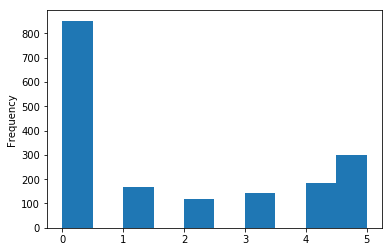

In [48]:
table_full_sample['00_serial_7'].plot.hist()

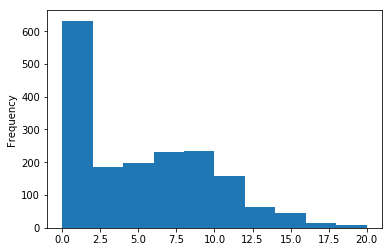

In [49]:
table_full_sample['00_total_recall'].plot.hist()

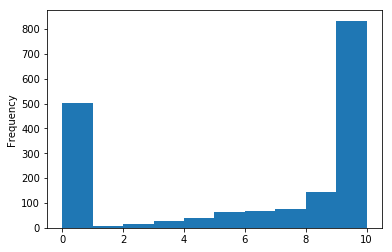

In [50]:
table_full_sample['00_tics'].plot.hist()

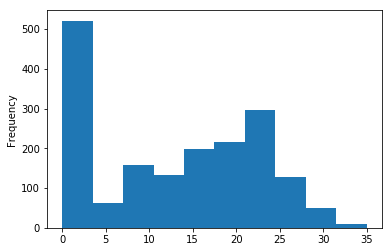

In [51]:
table_full_sample['00_total_cog'].plot.hist()

### Calculate scores for HRS 2002

In [52]:
# recode backwards count 20
backwards_20=rf.initialize_series(df)
indices=rf.get_indices([df['hd129']==1, # 1
                        df['hd124']==1 # 2
                       ])
backwards_20=rf.update_series(backwards_20, indices, values=[1,2])

In [53]:
# examine recode
backwards_20.value_counts()
table_full_sample['02_backwards_20'] = backwards_20

In [54]:
# Recode immediate recall
df['hd182m1'].unique()

array([ 19.,  nan,  32.,  38.,   1.,   2.,  96.,  40.,  16.,  30.,   8.,
        11.,  21.,  25.,  12.,   4.,  18.,  35.,  14.,  31.,  29.,  51.,
        99.,  23.,  27.,  24.,  34.,  17.,  39.,  33.,   9.,  26.,  15.,
        28.,   7.,  37.,   3.,  10.,  36.,  20.,  22.,   5.,  13.])

In [55]:
immediate_recall=pd.Series(rf.compute_recall(df, cols=['hd182m1','hd182m10']))

# examine immediate recall score
sum(immediate_recall.isnull()) # no missing values
immediate_recall.unique()
immediate_recall.value_counts()

0     727
4     233
3     219
5     199
2     141
6     115
7      53
1      52
8      15
9      12
10      4
dtype: int64

In [56]:
delayed_recall = rf.compute_recall(df, cols=['hd183m1', 'hd183m10'])
total_recall = pd.Series([x + y for x, y in zip(immediate_recall, delayed_recall)])

In [57]:
table_full_sample['02_immediate_recall'] = immediate_recall
table_full_sample['02_delayed_recall'] = delayed_recall
table_full_sample['02_total_recall'] = total_recall

In [58]:
# compute serial 7 score (G1806-G1810)
serial_7=rf.compute_serial(df, cols=['hd142','hd146'])
table_full_sample['02_serial_7'] = serial_7

In [59]:
# examine tics (G1852)
tics=df['hd170']

# recode tics
indices=rf.get_indices([tics.isnull()])
tics=rf.update_series(tics, indices, values=[0])
table_full_sample['02_tics'] = tics

In [60]:
total_cog = tics + total_recall + serial_7
table_full_sample['02_total_cog'] = total_cog


### Append raw scores 

In [61]:
# Define and calculate total_cog, total_recall, tics, immediate_recall, delayed_recall, backward_20 variables
table_full_sample['immediate_recall'] = table_full_sample['00_immediate_recall']
table_full_sample['delayed_recall'] = table_full_sample['00_delayed_recall'] 
table_full_sample['total_recall'] = table_full_sample['00_total_recall']
table_full_sample['serial7'] = table_full_sample['00_serial_7']
table_full_sample['tics'] = table_full_sample['00_tics']
table_full_sample['total_cog'] = table_full_sample['00_total_cog']
table_full_sample['backwards_20'] = table_full_sample['00_backwards_20']

# Add in HRS 2002 sample
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['immediate_recall']] = table_full_sample['02_immediate_recall']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['delayed_recall']] = table_full_sample['02_delayed_recall']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['total_recall']] = table_full_sample['02_total_recall']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['serial7']] = table_full_sample['02_serial_7']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['tics']] = table_full_sample['02_tics']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['total_cog']] = table_full_sample['02_total_cog']
table_full_sample.loc[table_full_sample['hhidpn'].isin(in_adams02), ['backwards_20']] = table_full_sample['02_backwards_20']


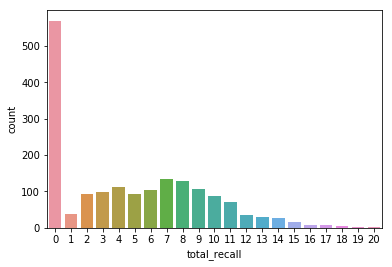

In [62]:
# Check data
sns.countplot(table_full_sample['total_recall'])

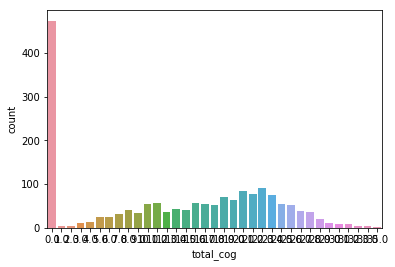

In [63]:
sns.countplot(table_full_sample['total_cog'])

In [64]:
table_full_sample.loc[:, ['total_cog', 'total_recall','tics','serial7','backwards_20','delayed_recall', 'immediate_recall']].describe()

,total_cog,total_recall,tics,serial7,backwards_20,delayed_recall,immediate_recall
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,12.775141,4.810169,6.197740,1.767232,1.222034,1.928249,2.881921
std,9.652074,4.492077,4.145106,1.998600,0.973284,2.223250,2.456901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,4.000000,8.000000,1.000000,2.000000,1.000000,3.000000
75%,21.000000,8.000000,10.000000,4.000000,2.000000,4.000000,5.000000
max,35.000000,20.000000,10.000000,5.000000,2.000000,10.000000,10.000000


## D. Create labels

### Herzog & Wallace (1997)

Herzog & Wallace proposed that a total cognition score (out of 35) that's >8 is indicative of normal cognitive functioning, while a score that's <=8 is indicative of cognitive impairment. Based on the literature, this method doesn't seem to be that great...

In [65]:
df = table_full_sample
total_cog = table_full_sample['total_cog']
total_recall = table_full_sample['total_recall']
serial_7 = table_full_sample['serial7']
backwards_20 = table_full_sample['backwards_20']

In [66]:
# create labels from total cognition score via Herzog & Wallace method (binary)
brain_health_labels1=rf.initialize_series(df)
indices=rf.get_indices([total_cog<=8])
brain_health_labels1=rf.update_series(brain_health_labels1, indices, values=[1]) # 0: normal, 1: cognitive impairment

In [67]:
# examine labels (Herzog & Wallace)
brain_health_labels1.value_counts()

0    1140
1     630
dtype: int64

### Langa & Weir (2009)

Langa & Weir proposed that a total cognition score (out of 27 and not 35!) that's >12 is indicative of normal cognitive functioning, while a score from 7-11 is indicative of cognitive impairment and a score that's <7 is indicative of dementia. Based on the literature, this method is much better!

In [68]:
# create labels from total cognition score via Langa & Weir method (3 levels)
revised_total_cog=backwards_20 + total_recall + serial_7
#revised_total_cog.value_counts()
#revised_total_cog.min(), revised_total_cog.max()

brain_health_labels2=rf.initialize_series(df)
indices=rf.get_indices([revised_total_cog.between(7,11), # 1: cognitive impairment
                        revised_total_cog.between(0,6) # 2: dementia
                       ])
brain_health_labels2=rf.update_series(brain_health_labels2, indices, values=[1,2]) # 0: normal

In [69]:
# examine labels (Langa & Weir)
brain_health_labels2.value_counts()

2    824
0    610
1    336
dtype: int64

In [70]:
# create labels from total cognition score via Langa & Weir method (2 levels)
brain_health_labels3=rf.initialize_series(df)
indices=rf.get_indices([brain_health_labels2.between(1,2)])
brain_health_labels3=rf.update_series(brain_health_labels3, indices, values=[1]) # 0: normal, 1: non-normal 

In [71]:
# examine recode
brain_health_labels3.value_counts()

1    1160
0     610
dtype: int64

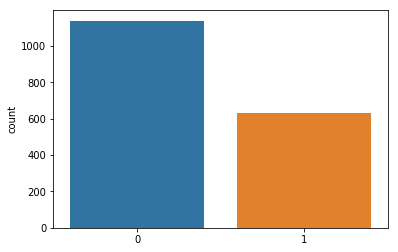

In [72]:
sns.countplot(brain_health_labels1)

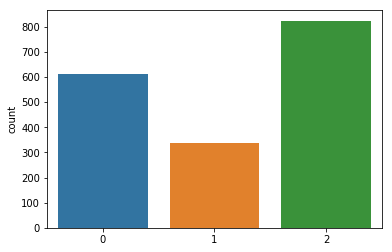

In [73]:
sns.countplot(brain_health_labels2)

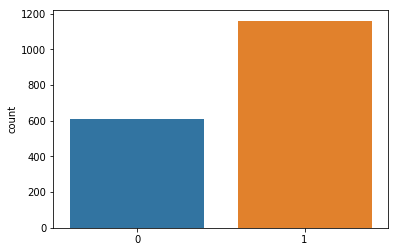

In [74]:
sns.countplot(brain_health_labels3)

### Append labels

In [75]:
# Add brain health labels
table_full_sample['brain_health_1'] = brain_health_labels1
table_full_sample['brain_health_2'] = brain_health_labels2
table_full_sample['brain_health_3'] = brain_health_labels3

In [76]:
table_full_sample['brain_health_1'].value_counts()

0    1140
1     630
Name: brain_health_1, dtype: int64

In [77]:
# Just the ADAMS respondents
table_small_sample = table_full_sample.loc[table_full_sample['AYEAR']!=9997, :]

In [78]:
table_small_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 1769
Columns: 13502 entries, HHID to brain_health_3
dtypes: float32(7), float64(12649), int64(87), object(759)
memory usage: 88.2+ MB


## E. Save table

In [79]:
table_full_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Columns: 13502 entries, HHID to brain_health_3
dtypes: float32(7), float64(12649), int64(87), object(759)
memory usage: 182.4+ MB


In [80]:
table_full_sample.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/final_adams_hrs_combined.csv', index=False)
#table_full_sample.to_pickle('/home/levi/data/brainFitDx/data/sample/final_adams_hrs_combined.pkl')

In [81]:
table_small_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 1769
Columns: 13502 entries, HHID to brain_health_3
dtypes: float32(7), float64(12649), int64(87), object(759)
memory usage: 88.2+ MB


In [82]:
table_small_sample.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/final_adams_hrs_combined_small.csv', index=False)
#table_full_sample.to_pickle('/home/levi/data/brainFitDx/data/sample/final_adams_hrs_combined_small.pkl')

In [83]:
in_adams = table_adams['hhidpn']
in_2000 = table_2000['hhidpn']
in_2002 = table_2002['hhidpn']

In [84]:
in_adams.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/ids_for_adams_fullsample.csv')
in_2000.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/ids_for_2000HRS_fullsample.csv')
in_2002.to_csv(LOCAL_DIR + 'brainFitDx/data/sample/ids_for_2002HRS_fullsample.csv')

## F. Process the complete HRS 2000 data

In [85]:
# load file
# table_full_sample = pd.read_csv('/home/levi/data/brainFitDx/data/sample/final_adams_hrs_combined.csv')
df = table_2000

In [86]:
# recode backwards count 20
backwards_20=rf.initialize_series(df)
indices=rf.get_indices([df['g1733']==1, # 1
                        df['g1710']==1 # 2
                       ])
backwards_20=rf.update_series(backwards_20, indices, values=[1,2])

In [87]:
# examine recode
backwards_20.value_counts()

2    16550
0     2984
1       45
dtype: int64

In [88]:
# examine immediate recall questions (G1666M1-G1666M11)
df['g1666m1'].unique()

array([ 38.,  30.,   4.,  17.,  40.,  19.,  15.,   1.,  11.,  nan,  10.,
        31.,  13.,  12.,  29.,  39.,  34.,  23.,   3.,  35.,  21.,   5.,
        24.,  20.,  18.,  36.,  32.,  22.,  25.,  33.,  14.,   8.,   9.,
        98.,   2.,  26.,  51.,  16.,  28.,  27.,   7.,  96.,   6.,  37.,
        99.])

In [89]:
# compute immediate recall score (G1666M1-G1666M11)
immediate_recall=pd.Series(rf.compute_recall(df, cols=['g1666m1','g1666m11']))

In [90]:
# examine immediate recall score
sum(immediate_recall.isnull()) # no missing values
immediate_recall.unique()
immediate_recall.value_counts()

6     3769
5     3760
4     2672
7     2660
0     2387
8     1453
3     1426
9      562
2      525
10     199
1      166
dtype: int64

In [91]:
# compute delayed recall score (G1815M1-G1815M11)
delayed_recall=pd.Series(rf.compute_recall(df, cols=['g1815m1','g1815m11']))

In [92]:
# examine delayed recall score
delayed_recall.unique()

array([ 3, 10,  5,  7,  6,  4,  0,  8,  2,  1,  9])

In [93]:
# compute total recall score (immediate recall + delayed recall)
total_recall=immediate_recall.add(delayed_recall)

In [94]:
# examine total recall score
pd.DataFrame({'total': total_recall, 'immediate': immediate_recall, 'delayed': delayed_recall}).head()

,total,immediate,delayed
0,8,5,3
1,20,10,10
2,11,6,5
3,14,7,7
4,20,10,10


In [95]:
# examine serial 7 (G1806-G1810)
df['g1806'].unique()
df.loc[:,'g1806':'g1810'].head()

,g1806,g1807,g1808,g1809,g1810
0,97.0,94.0,998.0,NaN,NaN
1,93.0,86.0,78.0,71.0,64.0
2,93.0,86.0,79.0,72.0,65.0
3,93.0,86.0,79.0,72.0,65.0
4,93.0,86.0,79.0,72.0,65.0


In [96]:
# compute serial 7 score (G1806-G1810)
serial_7=rf.compute_serial(df, cols=['g1806','g1810'])

In [97]:
# examine serial 7 score
serial_7.unique()
serial_7.value_counts()

5    7386
0    4005
4    3047
3    1961
1    1750
2    1430
dtype: int64

In [98]:
# examine tics (G1852)
tics=df['g1852']
tics.value_counts()

10.0    6182
9.0     1764
8.0      692
7.0      302
6.0      165
5.0       99
4.0       65
3.0       46
2.0       21
1.0       10
0.0        7
Name: g1852, dtype: int64

In [99]:
# recode tics
indices=rf.get_indices([tics.isnull()])
tics=rf.update_series(tics, indices, values=[0])
tics.value_counts()

0.0     10233
10.0     6182
9.0      1764
8.0       692
7.0       302
6.0       165
5.0        99
4.0        65
3.0        46
2.0        21
1.0        10
Name: g1852, dtype: int64

In [100]:
# compute total cognition score (tics + total_recall + serial_7)
total_cog=tics + total_recall + serial_7

In [101]:
# examine total cognition score
total_cog.unique()
total_cog.value_counts()

0.0     2110
17.0    1132
16.0    1118
18.0    1108
15.0    1085
19.0    1009
14.0    1008
20.0     981
21.0     899
23.0     878
22.0     859
13.0     821
24.0     787
25.0     743
12.0     676
26.0     599
11.0     501
27.0     488
10.0     451
28.0     357
9.0      336
8.0      287
29.0     231
7.0      229
30.0     167
6.0      155
31.0     136
5.0      122
4.0       86
32.0      59
3.0       52
33.0      39
2.0       25
35.0      18
1.0       15
34.0      12
dtype: int64

In [102]:
# Add score data to tables
table_2000['backwards_20'] = backwards_20
table_2000['serial7'] = serial_7
table_2000['immediate_recall'] = immediate_recall
table_2000['delayed_recall'] = delayed_recall
table_2000['total_recall'] = total_recall
table_2000['tics'] = tics
table_2000['total_cog'] = total_cog


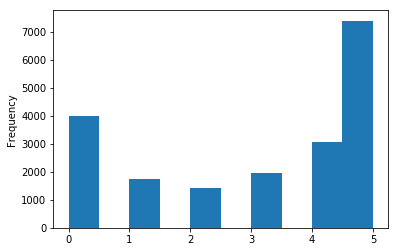

In [103]:
table_2000['serial7'].plot.hist()

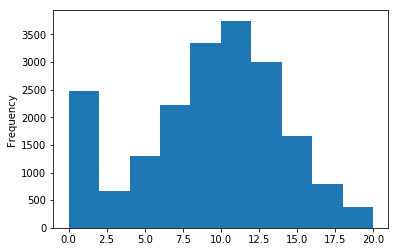

In [104]:
table_2000['total_recall'].plot.hist()

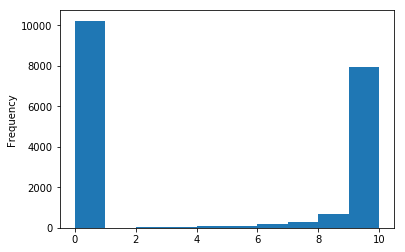

In [105]:
table_2000['tics'].plot.hist()

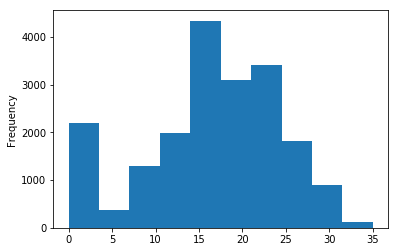

In [106]:
table_2000['total_cog'].plot.hist()

In [107]:
df = table_2000
total_cog = table_2000['total_cog']
total_recall = table_2000['total_recall']
serial_7 = table_2000['serial7']
backwards_20 = table_2000['backwards_20']

In [108]:
# create labels from total cognition score via Herzog & Wallace method (binary)
brain_health_labels1=rf.initialize_series(df)
indices=rf.get_indices([total_cog<=8])
brain_health_labels1=rf.update_series(brain_health_labels1, indices, values=[1]) # 0: normal, 1: cognitive impairment

In [109]:
# examine labels (Herzog & Wallace)
brain_health_labels1.value_counts()

0    16498
1     3081
dtype: int64

### Langa & Weir (2009)

Langa & Weir proposed that a total cognition score (out of 27 and not 35!) that's >12 is indicative of normal cognitive functioning, while a score from 7-11 is indicative of cognitive impairment and a score that's <7 is indicative of dementia. Based on the literature, this method is much better!

In [110]:
# create labels from total cognition score via Langa & Weir method (3 levels)
revised_total_cog=backwards_20 + total_recall + serial_7
#revised_total_cog.value_counts()
#revised_total_cog.min(), revised_total_cog.max()

brain_health_labels2=rf.initialize_series(df)
indices=rf.get_indices([revised_total_cog.between(7,11), # 1: cognitive impairment
                        revised_total_cog.between(0,6) # 2: dementia
                       ])
brain_health_labels2=rf.update_series(brain_health_labels2, indices, values=[1,2]) # 0: normal

In [111]:
# examine labels (Langa & Weir)
brain_health_labels2.value_counts()

0    13666
2     3068
1     2845
dtype: int64

In [112]:
# create labels from total cognition score via Langa & Weir method (2 levels)
brain_health_labels3=rf.initialize_series(df)
indices=rf.get_indices([brain_health_labels2.between(1,2)])
brain_health_labels3=rf.update_series(brain_health_labels3, indices, values=[1]) # 0: normal, 1: non-normal 

In [113]:
# examine recode
brain_health_labels3.value_counts()

0    13666
1     5913
dtype: int64

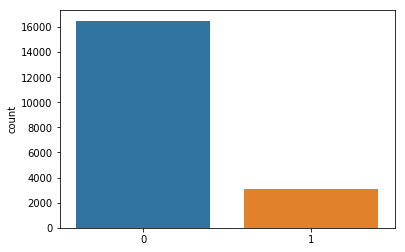

In [114]:
sns.countplot(brain_health_labels1)

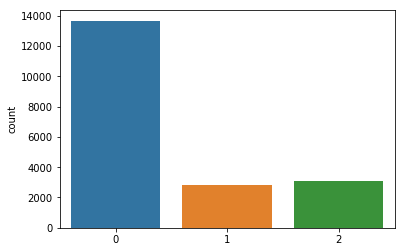

In [115]:
sns.countplot(brain_health_labels2)

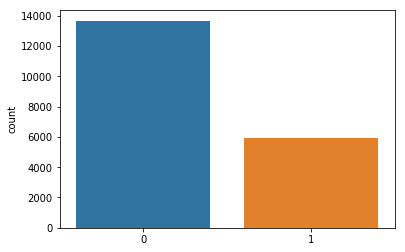

In [116]:
sns.countplot(brain_health_labels3)

In [117]:
# Add brain health labels
table_2000['brain_health_1'] = brain_health_labels1
table_2000['brain_health_2'] = brain_health_labels2
table_2000['brain_health_3'] = brain_health_labels3

### Save 2000 Data

In [118]:
table_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 19578
Columns: 6165 entries, hhidpn to brain_health_3
dtypes: float32(5), float64(5271), int16(55), int32(8), int64(8), int8(352), object(466)
memory usage: 868.5+ MB


In [119]:
# Filter our irrelevant tables

map1 = table_2000.keys().str.contains('^hhidpn|^brain_health|^total|^delayed|^immediate|^tics|^serial|^backwards|^g[1-3]', regex=True).tolist()
df = table_2000.loc[:,map1]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 19578
Columns: 2612 entries, hhidpn to brain_health_3
dtypes: float32(4), float64(2173), int16(7), int32(1), int64(8), int8(138), object(281)
memory usage: 371.7+ MB


In [121]:
df.to_csv(LOCAL_DIR + 'braindata/process_hrs2000.csv', index=False)
df.to_pickle(LOCAL_DIR + 'braindata/process_hrs2000.pkl')

In [122]:
df['brain_health_1'].value_counts()

0    16498
1     3081
Name: brain_health_1, dtype: int64

In [123]:
df['brain_health_2'].value_counts()

0    13666
2     3068
1     2845
Name: brain_health_2, dtype: int64

In [124]:
df['brain_health_3'].value_counts()

0    13666
1     5913
Name: brain_health_3, dtype: int64

## G. Final Output

*  `final_adams_and_hrs.csv` [1770 obs]

* `final_adams_and_hrs_small.csv` [856 obs]

* `processed_hrs2000.csv, processed_hrs2000.pkl` [Too large to save to git]

* `in_adams (hhidpns in Adams), in_2000 (HRS2000), in_2002 (HRS2000), in_adams2 (HRS2002 in Adams)`
